In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
##### INDEED #####

# a job posting website (as well as resume hosting)


# scrape some (or A LOT) of job postings from indeed for the job "data scientist"


# Plan of Action:
# http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA
# 1. Figure out the url for getting the summaries (by doing it yourself!)
# 2. Scrape the summary
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)
# 4. BONUS: count the most used words in the sumaries


In [4]:
# 1. Figure out the url for getting the summaries (by doing it yourself!)
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco,+CA')
b = BeautifulSoup(r.text, 'html.parser')

In [5]:
# 2. Scrape the summary
summary_tags = b.findAll('span', attrs={'class':'summary'})

In [6]:
# summary_tags[0].text

summary_texts = [t.text.lower().strip() for t in summary_tags]
summary_texts[0]

u'requirements for all data scientists. expert in python and core libraries used by data scientists (numpy, scipy, pandas, scikit-learn, matplotlib/seaborn, etc.)...'

In [7]:
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)

page = '10'## multiple of 10
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco,+CA&start='+page) 
b = BeautifulSoup(r.text, 'html.parser')

In [8]:
# 4. BONUS: count the most used words in the sumaries
single_block_of_text = reduce(lambda x,y: x+' '+y, summary_texts)
single_block_of_text

words_tokenized = single_block_of_text.split(' ')
words_tokenized[:10]

from collections import Counter

sorted(Counter(words_tokenized).items(), key = lambda x:x[1])[-20:]

[(u'science', 3),
 (u'r', 3),
 (u'engineering', 3),
 (u'at', 3),
 (u'a', 3),
 (u'team', 4),
 (u'analytics', 4),
 (u'are', 4),
 (u'scientists', 4),
 (u'on', 4),
 (u'learning', 4),
 (u'is', 4),
 (u'to', 5),
 (u'in', 5),
 (u'machine', 7),
 (u'for', 8),
 (u'the', 10),
 (u'of', 11),
 (u'data', 23),
 (u'and', 24)]

In [9]:
#### UFO ######

# SCRAPE ALL SIGHTINGS in 2016
# Plan of action
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings
# 3. Make a dataframe out of it
# 4. make a day column
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)


In [10]:
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings

yr_months = ['201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608']

ufo_sightings = {
        'Date':[],
        'City':[],
        'State':[],
        'Shape':[],
        'Summary':[]
    }

for month in yr_months:
    url = 'http://www.nuforc.org/webreports/ndxe' + month + '.html'
    r = requests.get(url)
    b = BeautifulSoup(r.text, 'html.parser')
    for tr in b.findAll('tr', attrs = {'valign':'TOP'}):
        # the findChildren method returns all children underneath it
        ufo_sighting_info = []
        for child in tr.findChildren():
            ufo_sighting_info.append(child.text)
        ufo_sightings['Date'].append(ufo_sighting_info[0])
        ufo_sightings['City'].append(ufo_sighting_info[3])
        ufo_sightings['State'].append(ufo_sighting_info[5])
        ufo_sightings['Shape'].append(ufo_sighting_info[7])
        ufo_sightings['Summary'].append(ufo_sighting_info[12])

In [11]:
# 3. Make a dataframe out of it

ufo = pd.DataFrame(ufo_sightings)
ufo.head()

City           Date     Shape State  \
0                             Stanton  1/31/16 23:10  Triangle    TX   
1  Emigrant Pass (near; foothills of)  1/31/16 23:00     Other    OR   
2                           Allentown  1/31/16 22:00  Fireball    PA   
3                           Sandpoint  1/31/16 20:57  Fireball    ID   
4                       West Suffield  1/31/16 20:46    Circle    CT   

                                             Summary  
0          Flying Triangle object Martin County, TX.  
1  Seen a object with a solid orange bar that lit...  
2  Yellow beam of light falling from the sky, wit...  
3  Object came in from west to east below approx ...  
4  \tI saw 3 orange lights in a formation coming ...

In [12]:
# 4. make a day column

from datetime import datetime

def parse_date(x):
    for fmt in ('%m/%d/%y %H:%M', '%m/%d/%y'):
        try:
            return datetime.strptime(x, fmt)
        except ValueError:
            pass

ufo['time'] = ufo.Date.apply(parse_date)
ufo['day'] = ufo.Date.apply(parse_date).dt.day

In [13]:
ufo.head()

City           Date     Shape State  \
0                             Stanton  1/31/16 23:10  Triangle    TX   
1  Emigrant Pass (near; foothills of)  1/31/16 23:00     Other    OR   
2                           Allentown  1/31/16 22:00  Fireball    PA   
3                           Sandpoint  1/31/16 20:57  Fireball    ID   
4                       West Suffield  1/31/16 20:46    Circle    CT   

                                             Summary                time  day  
0          Flying Triangle object Martin County, TX. 2016-01-31 23:10:00   31  
1  Seen a object with a solid orange bar that lit... 2016-01-31 23:00:00   31  
2  Yellow beam of light falling from the sky, wit... 2016-01-31 22:00:00   31  
3  Object came in from west to east below approx ... 2016-01-31 20:57:00   31  
4  \tI saw 3 orange lights in a formation coming ... 2016-01-31 20:46:00   31

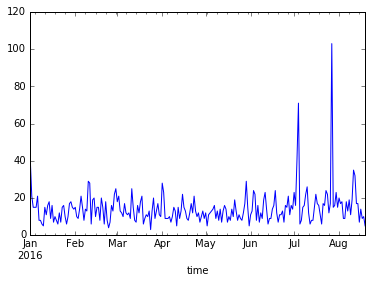

In [14]:
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)

import matplotlib.pyplot as plt
%matplotlib inline

ufo.groupby(pd.Grouper(key='time',freq='1d')).count().day.plot()

# no it is not 4th of july

In [15]:
##### TWITTER ######

# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
# include a column for date, text, user handle, user name, and user image
# You can use the normal query method and not stream for this!

api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

# Masahpe Key
mashape_key = '0CLvblsJOxmshWkaep4szo9CILOMp1PM3hhjsnDi4k8g8ME14o'

In [16]:
import tweepy       # python wrapper for twitter api
import json
import time

In [18]:
# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
tag = '#Rio2016'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object
tweets = api.search(q=tag)

In [23]:
# include a column for date, text, user handle, user name, and user image
rio_tweets = {'date': [], 'text': [],
        'user_handle': [], 'user_name': [],
        'user_image': []}

for t in tweets:
    rio_tweets['date'].append(t.created_at)
    rio_tweets['text'].append(t.text)
    rio_tweets['user_handle'].append(t.author.screen_name)
    rio_tweets['user_name'].append(t.author.name)
    rio_tweets['user_image'].append(t.author.profile_image_url)

In [24]:
# You can use the normal query method and not stream for this!

rio_tweets_df = pd.DataFrame(rio_tweets)

In [25]:
rio_tweets_df.head()

date                                               text  \
0 2016-08-21 17:59:16  Pqp! Jogo sensacional do Brasil ! É ouro de no...   
1 2016-08-21 17:59:16         Ama İtalyanlar ağlamasın yazıkkkk #Rio2016   
2 2016-08-21 17:59:16  Don't swet @Nigerians we av got dekunle#Gold, ...   
3 2016-08-21 17:59:16  RT @AnaPaulaVolei: É #Ouro! É #Ouro! É #Ouro B...   
4 2016-08-21 17:59:16  RT @RedeGlobo: ACABOU ACABOU! É #ouro!! #Somos...   

       user_handle                                         user_image  \
0      WAGNERMELO9  http://pbs.twimg.com/profile_images/7208674977...   
1  enjjoythesilenc  http://pbs.twimg.com/profile_images/7384125435...   
2       onwumechba  http://pbs.twimg.com/profile_images/7502791849...   
3     JorgePontual  http://pbs.twimg.com/profile_images/6265763920...   
4       AndermanAl  http://pbs.twimg.com/profile_images/7644435936...   

              user_name  
0           WAGNER MELO  
1              Özge Kap  
2  anthony o onwumechba  
3         Jorge Pontual  
4                Leti 